In [14]:
#importando as bibliotecas necessárias
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [10]:
#lendo o dataset
data = pd.read_csv('../datasets/data_1024.csv', sep='\t')

In [11]:
#mostrando as 5 primeiras linhas
data.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0


In [12]:
#mostrando a forma, ou seja, linha X colunas
data.shape

(4000, 3)

In [13]:
#remover ID pois não influenciará no cluster
data.drop('Driver_ID', axis=1, inplace=True)

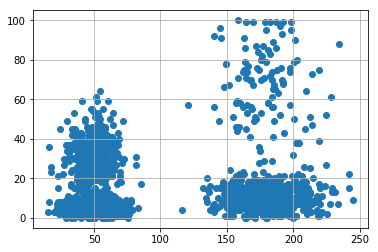

In [20]:
#plotando um gráfico de pontos
plt.scatter(data.values[:, 0], data.values[:, 1])
plt.grid();

In [23]:
#biblioteca para clusterização
from sklearn.cluster import KMeans

In [67]:
#método do cotovelo para identificar o melhor número de clusters
inertias = []
inicio = 1
fim = 10
for i in range(inicio, fim):
    km = KMeans(n_clusters=i, init='k-means++')
    km.fit(data.values)
    inertias.append(km.inertia_)

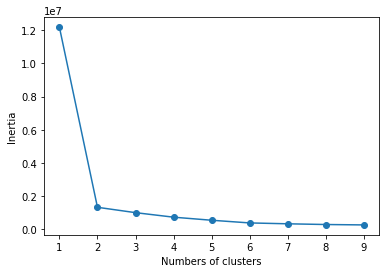

In [68]:
#plotando gráfico para indentificar o melhor número de clusteres
plt.plot(range(inicio, fim), inertias, marker='o')
plt.xlabel('Numbers of clusters')
plt.ylabel('Inertia');

In [74]:
#criando os clusteres
KM = KMeans(n_clusters=2, init='k-means++')

In [81]:
#descobrindo o label
y = KM.fit_predict(data.values)

In [82]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [83]:
#descobrindo os centros
centroids = KM.cluster_centers_

In [84]:
centroids

array([[180.017075  ,  18.29      ],
       [ 50.04763437,   8.82875   ]])

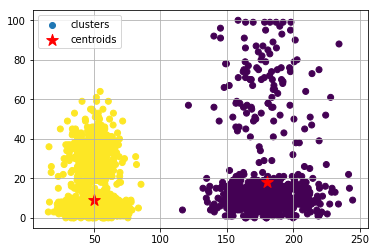

In [96]:
#plotando gráfico com clusters defidos
plt.scatter(data.values[:, 0], data.values[:, 1], c=y, label='clusters')
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', marker='*', s=150, label='centroids')
plt.grid()
plt.legend(scatterpoints=1)

# Clusterização Hierárquica

In [113]:
from scipy.cluster.hierarchy import complete
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from scipy.spatial.distance import pdist

In [98]:
#matriz de distâncias
distance_matrix = pdist(data.values, metric='euclidean')

In [100]:
#modelo clusterizado usando complete
cluster_model = complete(distance_matrix)

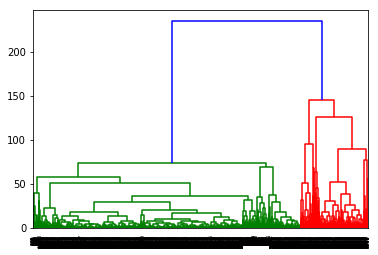

In [106]:
#dendrograma 
dgm = dendrogram(cluster_model)

In [114]:
sensor_cluster_list = cut_tree(cluster_model, n_clusters=2)

# DBSCAN

In [117]:
from sklearn.cluster import DBSCAN

In [118]:
dbscan = DBSCAN(eps=33, min_samples=60)

In [119]:
dbscan.fit(data.values)

DBSCAN(algorithm='auto', eps=33, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=60, n_jobs=None, p=None)

In [120]:
colors = np.array(['red', 'green', 'blue'])

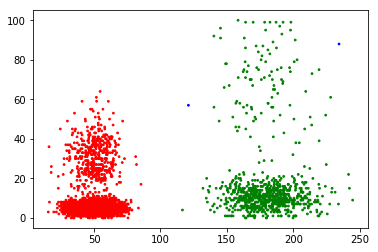

In [121]:
plt.scatter(data.values[:, 0], data.values[:, 1], c=colors[dbscan.labels_], s=3)